In [ ]:
#comparison of protein inference methods

In [2]:
import pandas as pd
import glob
import os

# Define a list of Q-values to filter for
q_values = [0.01, 0.02, 0.03, 0.04, 0.05]

# Create an empty list to store the data
data = []

# Replace '*.csv' with the pattern for your input files
for file_path in glob.glob('/Users/anabelyong/miniconda3/lib/python3.10/site-packages/jupyterlab/Subset750RawfilesCut/proteinGroups_methods_files/*.csv'):
    # Extract the method and number of raw files from the file name
    file_name = os.path.basename(file_path)
    method = file_name.split('proteinGroups_')[1].split('.csv')[0]
    num_raw_files = method.split('_')[-1]
    method = method.split('_' + num_raw_files)[0]

    # Read input CSV file into a DataFrame
    df = pd.read_csv(file_path)

    # Loop through the Q-values and filter for each one
    for q in q_values:
        filtered_df = df[df['Q-value'] < q]

        # Split the column by '|', but only keep the first two splits if there are more than 2
        split_col = filtered_df['Protein IDs'].str.split('|', n=2, expand=True)

        # Rename the new columns
        split_col.columns = ['Protein Type', 'Protein Uniprot', 'Protein Label']

        # Concatenate the original DataFrame and the new columns
        new_df = pd.concat([filtered_df['Q-value'], split_col], axis=1)

        # Count the number of target proteins (without 'REV__' in Protein Label)
        num_targets = len(new_df[new_df['Protein Label'].str.startswith('REV__', na=False)==False])

        # Add the data to the list
        data.append([file_name, method, num_raw_files, q, num_targets])

# Create a DataFrame from the list of data
df = pd.DataFrame(data, columns=['File Name', 'Method', 'Num Raw Files', 'Q-value', 'Num Target Proteins'])

# Write the DataFrame to a CSV file
df.to_csv('/Users/anabelyong/miniconda3/lib/python3.10/site-packages/jupyterlab/Subset750RawfilesCut/proteinGroups_methods_files/protein_inference.csv', index=False)


In [3]:
df=pd.read_csv('/Users/anabelyong/miniconda3/lib/python3.10/site-packages/jupyterlab/Subset750RawfilesCut/proteinGroups_methods_files/protein_inference.csv')
print(df)
               

                                             File Name  \
0    proteinGroups_picked_protein_group_no_remap_12...   
1    proteinGroups_picked_protein_group_no_remap_12...   
2    proteinGroups_picked_protein_group_no_remap_12...   
3    proteinGroups_picked_protein_group_no_remap_12...   
4    proteinGroups_picked_protein_group_no_remap_12...   
..                                                 ...   
715     proteinGroups_savitski_subset_no_remap_128.csv   
716     proteinGroups_savitski_subset_no_remap_128.csv   
717     proteinGroups_savitski_subset_no_remap_128.csv   
718     proteinGroups_savitski_subset_no_remap_128.csv   
719     proteinGroups_savitski_subset_no_remap_128.csv   

                            Method  Num Raw Files  Q-value  \
0    picked_protein_group_no_remap            128     0.01   
1    picked_protein_group_no_remap            128     0.02   
2    picked_protein_group_no_remap            128     0.03   
3    picked_protein_group_no_remap            128     0

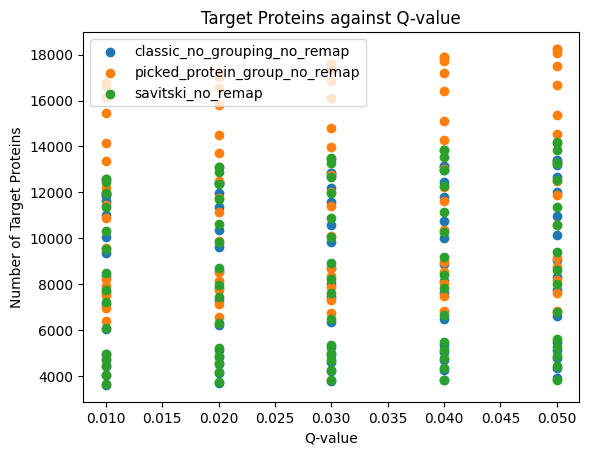

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the filtered data CSV file
df=pd.read_csv('/Users/anabelyong/miniconda3/lib/python3.10/site-packages/jupyterlab/Subset750RawfilesCut/proteinGroups_methods_files/protein_inference.csv')

# Filter the data to include only the desired methods
methods = ['classic_no_grouping_no_remap', 'savitski_no_remap', 'picked_protein_group_no_remap']
df = df[df['Method'].isin(methods)]

# Group the data by method
grouped = df.groupby('Method')

# Set up the plot
fig, ax = plt.subplots()

# Set up colors for each method
colors = ['tab:blue', 'tab:orange', 'tab:green']

# Loop through each group and plot the data
for i, (method, group) in enumerate(grouped):
    # Plot the data as a line
    ax.scatter(group['Q-value'], group['Num Target Proteins'], color=colors[i], label=method)

# Set up the legend and axis labels
ax.legend()
ax.set_xlabel('Q-value')
ax.set_ylabel('Number of Target Proteins')
ax.set_title('Target Proteins against Q-value')

# Show the plot
plt.show()

In [10]:
print(df['Method'].unique())

['picked_protein_group_no_remap' 'classic_grouping_no_remap'
 'savitski_subset_no_remap' 'classic_rescue_grouping_no_remap'
 'picked_no_grouping_no_remap' 'picked_subset_no_remap'
 'classic_no_grouping_no_remap' 'savitski_rescued_subset_no_remap'
 'savitski_no_remap']


In [12]:
# Read the CSV file into a pandas dataframe
df=pd.read_csv('/Users/anabelyong/miniconda3/lib/python3.10/site-packages/jupyterlab/Subset750RawfilesCut/proteinGroups_methods_files/protein_inference.csv')

# Filter the data by method name and number of raw files
method_name = 'classic_no_grouping_no_remap'.strip()  # strip any leading/trailing whitespaces
num_raw_files = 22796
filtered_df = df[(df['Method'] == method_name) & (df['Num Raw Files'] == num_raw_files)]

# Get the target protein counts for the selected q-values
q_values = [0.01, 0.02, 0.03, 0.04, 0.05]
target_protein_counts = filtered_df[filtered_df['Q-value'].isin(q_values)]['Num Target Proteins']

# Print the target protein counts
print(target_protein_counts)


360    11872
361    12409
362    12841
363    13141
364    13399
Name: Num Target Proteins, dtype: int64


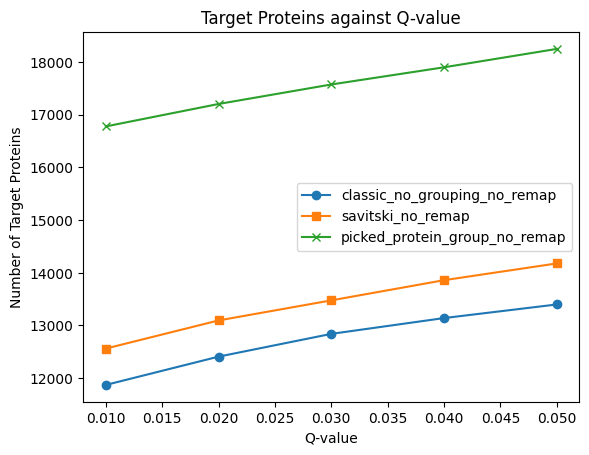

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data CSV file
df=pd.read_csv('/Users/anabelyong/miniconda3/lib/python3.10/site-packages/jupyterlab/Subset750RawfilesCut/proteinGroups_methods_files/protein_inference.csv')

# Select rows with 22756 raw files and one of three selected methods
selected_methods = ['classic_no_grouping_no_remap', 'savitski_no_remap', 'picked_protein_group_no_remap']
selected_data = df.loc[(df['Num Raw Files'] == 22796) & (df['Method'].isin(selected_methods))]

# Pivot the table to have q-values as columns and num target proteins as values
pivoted_data = selected_data.pivot_table(index='Method', columns='Q-value', values='Num Target Proteins')

# Set up the plot
fig, ax = plt.subplots()

# Loop through each method and plot the data
colors = ['tab:blue', 'tab:orange', 'tab:green']
markers = ['o', 's', 'x']
for i, method in enumerate(selected_methods):
    ax.plot(pivoted_data.loc[method].index, pivoted_data.loc[method], color=colors[i], marker=markers[i], label=method)

# Set up the legend and axis labels
ax.legend()
ax.set_xlabel('Q-value')
ax.set_ylabel('Number of Target Proteins')
ax.set_title('Target Proteins against Q-value')

# Show the plot
plt.show()


In [26]:
import os
import pandas as pd
import glob

# get a list of all csv files in a directory
csv_files = glob.glob('/Users/anabelyong/miniconda3/lib/python3.10/site-packages/jupyterlab/Subset750RawfilesCut/proteinGroups_methods_files/*.csv')

# create an empty list to store the results for each file
results_list = []

# loop over each csv file
for csv_file in csv_files:
    
    # read the csv file
    df = pd.read_csv(csv_file)
    
    # filter for protein IDs with more than one protein and q-value < 0.05
    filtered_df = df[(df['Number of proteins'] > 1) & (df['Q-value'] < 0.05)]
    
    # get the number of protein groups at different q-values
    num_protein_groups = []
    for q_value in [0.01, 0.02, 0.03, 0.04, 0.05]:
        num_protein_groups.append(len(df[(df['Number of proteins'] > 1) & (df['Q-value'] < q_value)]))
    
    # get the filename without the directory path
    filename = os.path.basename(csv_file)
    
    # extract the method name and number of raw files from the filename
    method_name = filename.split("proteinGroups_")[1].split("_")[0:-1]
    method_name = "_".join(method_name)
    num_raw_files = filename.split("_")[-1].split(".")[0]
    
    # create a dictionary with the filename, method name, number of raw files, and number of protein groups
    results_dict = {"Filename": filename, "Method": method_name, "Num_Raw_Files": num_raw_files, "Num_Protein_Groups_Q0.01": num_protein_groups[0], "Num_Protein_Groups_Q0.02": num_protein_groups[1], "Num_Protein_Groups_Q0.03": num_protein_groups[2], "Num_Protein_Groups_Q0.04": num_protein_groups[3], "Num_Protein_Groups_Q0.05": num_protein_groups[4]}
    
    # append the dictionary to the results list
    results_list.append(results_dict)
    
# convert the results list to a dataframe
results_df = pd.DataFrame(results_list)

# filter for Num_Raw_Files at 22796
results_df = results_df[results_df['Num_Raw_Files'] == '22796']

# save the results to a csv file
results_df.to_csv("protein_inference_part_2.csv", index=False)


In [27]:
df=pd.read_csv('protein_inference_part_2.csv')
print(df)

                                            Filename  \
0  proteinGroups_picked_no_grouping_no_remap_2279...   
1  proteinGroups_classic_rescue_grouping_no_remap...   
2  proteinGroups_picked_protein_group_no_remap_22...   
3     proteinGroups_picked_subset_no_remap_22796.csv   
4  proteinGroups_classic_no_grouping_no_remap_227...   
5   proteinGroups_savitski_subset_no_remap_22796.csv   
6  proteinGroups_classic_grouping_no_remap_22796.csv   
7          proteinGroups_savitski_no_remap_22796.csv   
8  proteinGroups_savitski_rescued_subset_no_remap...   

                             Method  Num_Raw_Files  Num_Protein_Groups_Q0.01  \
0       picked_no_grouping_no_remap          22796                         0   
1  classic_rescue_grouping_no_remap          22796                      8432   
2     picked_protein_group_no_remap          22796                      8611   
3            picked_subset_no_remap          22796                      3635   
4      classic_no_grouping_no_remap    

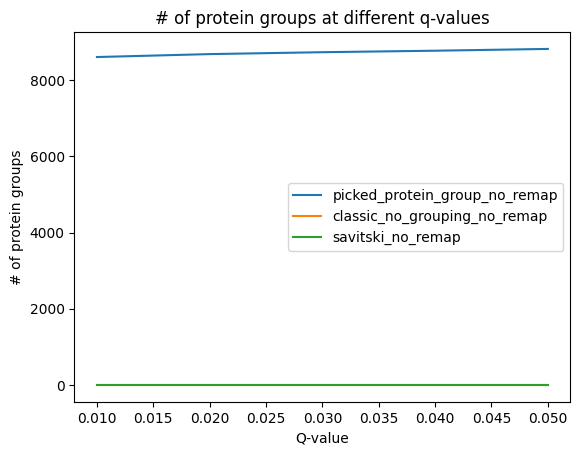

In [28]:
import matplotlib.pyplot as plt

# Filter the dataframe for the three methods you want to plot
filtered_df = df[df.Method.isin(['classic_no_grouping_no_remap', 'savitski_no_remap', 'picked_protein_group_no_remap'])]

# Set the q-values you want to plot
q_values = [0.01, 0.02, 0.03, 0.04, 0.05]

# Loop over the methods and plot the number of protein groups at each q-value
for method in filtered_df.Method.unique():
    method_df = filtered_df[filtered_df.Method == method]
    num_protein_groups = [method_df[f'Num_Protein_Groups_Q{q:.2f}'].iloc[0] for q in q_values]
    plt.plot(q_values, num_protein_groups, label=method)

# Add labels and legend to the plot
plt.xlabel('Q-value')
plt.ylabel('# of protein groups')
plt.title('# of protein groups at different q-values')
plt.legend()

# Show the plot
plt.show()